Here are concise answers to the theoretical questions:  

1. **What does R-squared represent in a regression model?**  
   R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

2. **What are the assumptions of linear regression?**  
   - Linearity  
   - Independence of errors  
   - Homoscedasticity (constant variance of errors)  
   - Normality of residuals  
   - No multicollinearity  

3. **What is the difference between R-squared and Adjusted R-squared?**  
   R-squared measures the fit of the model, while Adjusted R-squared accounts for the number of predictors, adjusting for overfitting.

4. **Why do we use Mean Squared Error (MSE)?**  
   MSE quantifies the average squared differences between predicted and actual values, emphasizing larger errors.

5. **What does an Adjusted R-squared value of 0.85 indicate?**  
   It suggests that 85% of the variability in the dependent variable is explained by the predictors, adjusted for the number of predictors.

6. **How do we check for normality of residuals in linear regression?**  
   Using:  
   - Q-Q plots  
   - Shapiro-Wilk test  
   - Histogram of residuals  

7. **What is multicollinearity, and how does it impact regression?**  
   Multicollinearity occurs when predictors are highly correlated, leading to unstable coefficients and reduced model interpretability.

8. **What is Mean Absolute Error (MAE)?**  
   MAE is the average of absolute differences between predicted and actual values, showing average magnitude of errors.

9. **What are the benefits of using an ML pipeline?**  
   - Automation of repetitive tasks  
   - Ensures reproducibility  
   - Streamlines preprocessing and modeling steps  

10. **Why is RMSE considered more interpretable than MSE?**  
    RMSE has the same units as the target variable, making it easier to understand compared to squared errors in MSE.

11. **What is pickling in Python, and how is it useful in ML?**  
    Pickling serializes objects into a binary format for storage or transfer, useful for saving trained models.

12. **What does a high R-squared value mean?**  
    It indicates that a large proportion of the variance in the dependent variable is explained by the model.

13. **What happens if linear regression assumptions are violated?**  
    The model results may be biased, inefficient, or invalid, reducing its reliability.

14. **How can we address multicollinearity in regression?**  
    - Remove correlated predictors  
    - Use dimensionality reduction techniques like PCA  
    - Apply ridge regression or LASSO  

15. **How can feature selection improve model performance in regression analysis?**  
    By reducing irrelevant features, it avoids overfitting, enhances interpretability, and improves computational efficiency.

16. **How is Adjusted R-squared calculated?**  
    \( \text{Adjusted R}^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right) \), where \( n \) is the number of observations and \( k \) is the number of predictors.

17. **Why is MSE sensitive to outliers?**  
    Squaring errors amplifies the effect of larger errors, making MSE more influenced by outliers.

18. **What is the role of homoscedasticity in linear regression?**  
    It ensures that the variance of residuals is constant, making statistical inferences valid.

19. **What is Root Mean Squared Error (RMSE)?**  
    RMSE is the square root of MSE, measuring the average magnitude of errors with the same units as the target variable.

20. **Why is pickling considered risky?**  
    Pickled files can execute arbitrary code when unpickled, posing security risks.

21. **What alternatives exist to pickling for saving ML models?**  
    - Joblib  
    - ONNX  
    - TensorFlow SavedModel  
    - PyTorch’s `.pt` format  

22. **What is heteroscedasticity, and why is it a problem?**  
    It occurs when residual variance is non-constant, leading to inefficient estimates and unreliable hypothesis tests.

23. **How can interaction terms enhance a regression model's predictive power?**  
    They capture relationships between variables that might influence the dependent variable when combined, improving the model’s explanatory power.

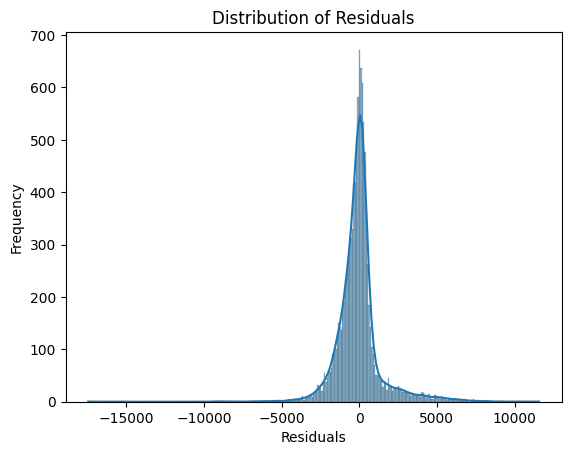

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the "diamonds" dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2242178.90
Mean Absolute Error (MAE): 888.48
Root Mean Squared Error (RMSE): 1497.39


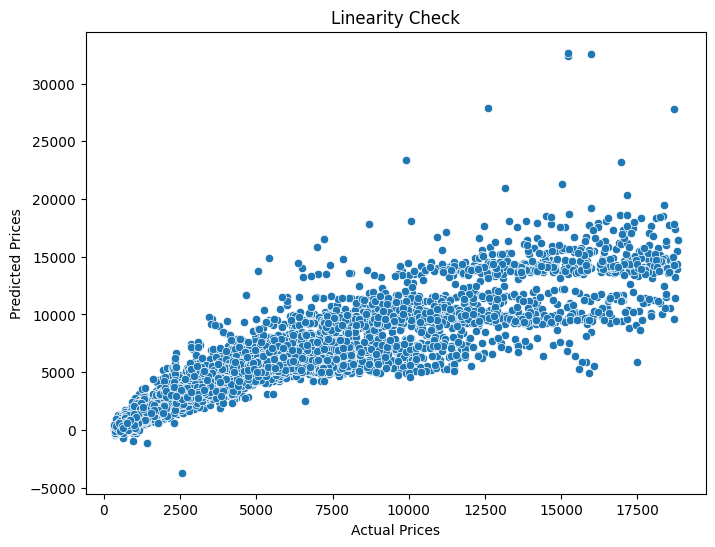

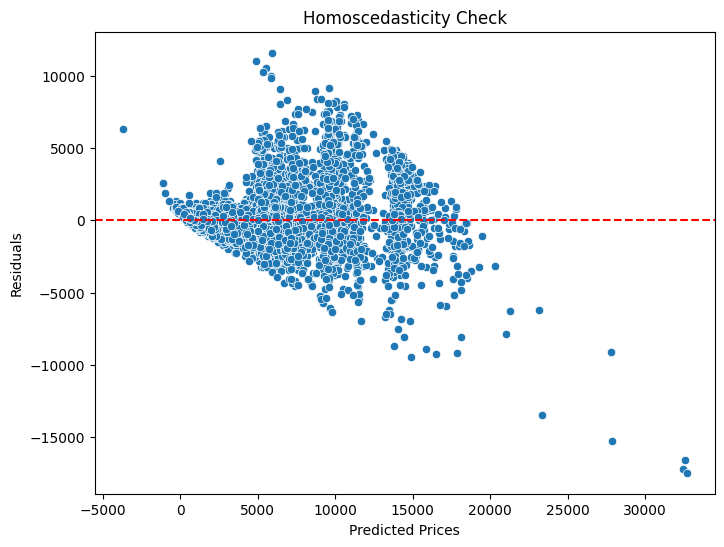

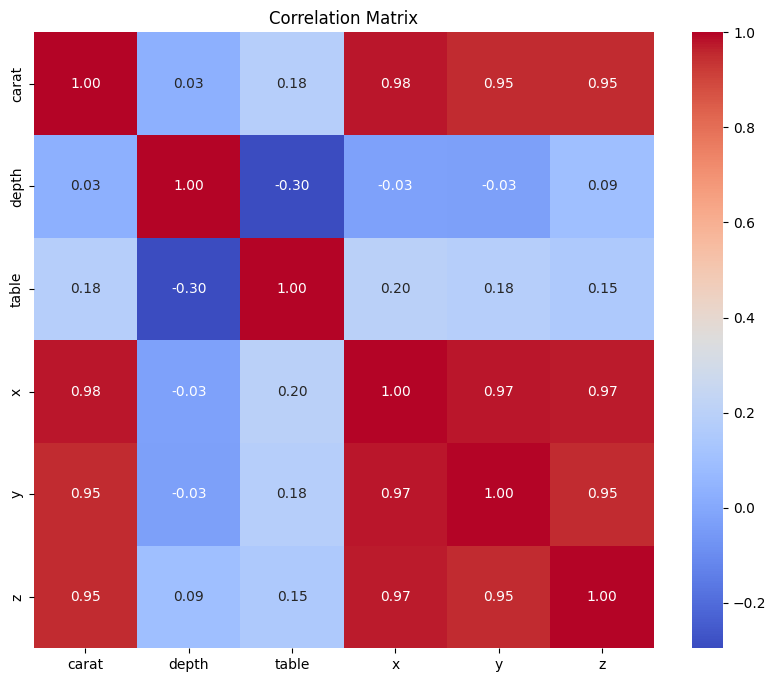

In [ ]:
import numpy as np

# Scatter plot for linearity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Linearity Check')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Residuals plot for homoscedasticity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# Correlation matrix for multicollinearity
corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Evaluate with cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Linear Regression Average R2 Score: {scores.mean():.3f}")

# Try with Random Forest
pipeline.set_params(model=RandomForestRegressor(random_state=42))
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Random Forest Average R2 Score: {scores.mean():.3f}")


Linear Regression Average R2 Score: -0.669
Random Forest Average R2 Score: -0.697


In [ ]:
from sklearn.linear_model import LinearRegression

# Select one feature for simple linear regression
X_simple = X[['carat']]  # Use 'carat' as an example feature

# Train-test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42)

# Fit linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Print coefficients, intercept, and R-squared
print(f"Coefficient: {simple_model.coef_[0]:.2f}")
print(f"Intercept: {simple_model.intercept_:.2f}")
r2_score_simple = simple_model.score(X_test_simple, y_test_simple)
print(f"R-squared: {r2_score_simple:.3f}")


Coefficient: 7768.91
Intercept: -2261.91
R-squared: 0.849


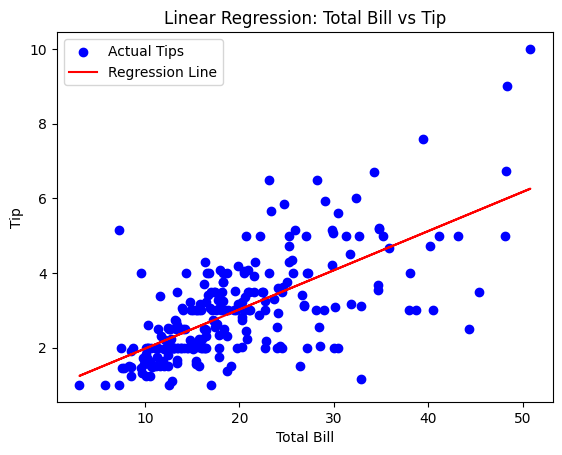

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load dataset
tips = sns.load_dataset('tips')

# Prepare the data
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict tips
y_pred = model.predict(X)

# Visualize the results
plt.scatter(X, y, color='blue', label='Actual Tips')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression: Total Bill vs Tip')
plt.legend()
plt.show()


Coefficient (slope): 2.7993236574802762
Intercept: 4.142913319458566
R-squared Score: 0.8072


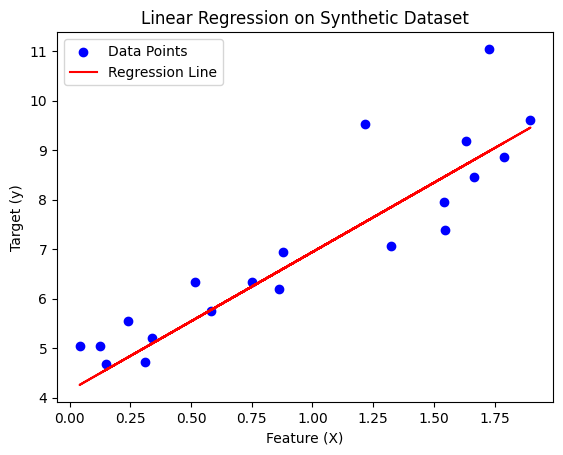

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate a synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients and intercept
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

# Plot the data points and regression line
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Dataset')
plt.legend()
plt.show()

In [3]:
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1).ravel()

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved to 'linear_regression_model.pkl'")


Model saved to 'linear_regression_model.pkl'


ValueError: x and y can be no greater than 2D, but have shapes (100, 1) and (100, 1, 1)

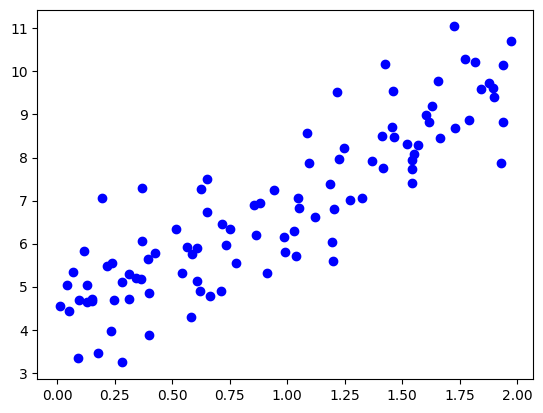

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Transform features to polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot the data points and regression curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), y_pred[np.argsort(X, axis=0)], color='red', label='Polynomial Regression Curve')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

# Print R-squared score
print(f"R-squared Score: {r2_score(y, y_pred):.4f}")

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")

Coefficient (slope): 2.7701133864384837
Intercept: 4.215096157546747


Degree 1: MSE = 0.8066
Degree 2: MSE = 0.7772
Degree 3: MSE = 0.7725
Degree 4: MSE = 0.7635
Degree 5: MSE = 0.7615


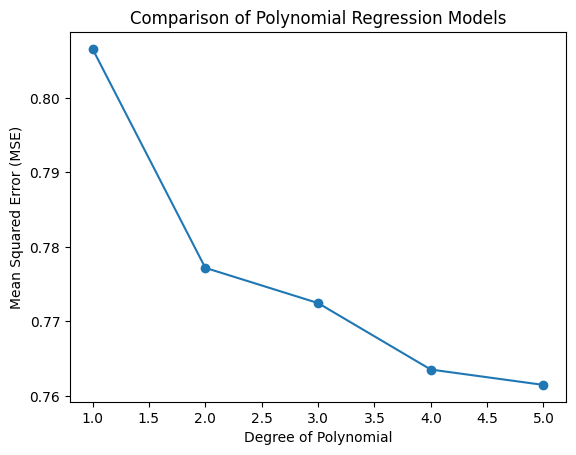

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Define degrees to test
degrees = [1, 2, 3, 4, 5]
mse_scores = []

# Fit models and calculate MSE for each degree
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)
    print(f"Degree {degree}: MSE = {mse:.4f}")

# Plot MSE scores for each degree
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Polynomial Regression Models')
plt.show()

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with two features
np.random.seed(42)
X = 2 * np.random.rand(100, 2)  # 100 data points with two features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100)  # Linear relationship with some noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {r2_score(y, model.predict(X)):.4f}")

Coefficients: [3.16933339 5.17747302]
Intercept: 3.7722722641017032
R-squared Score: 0.9240


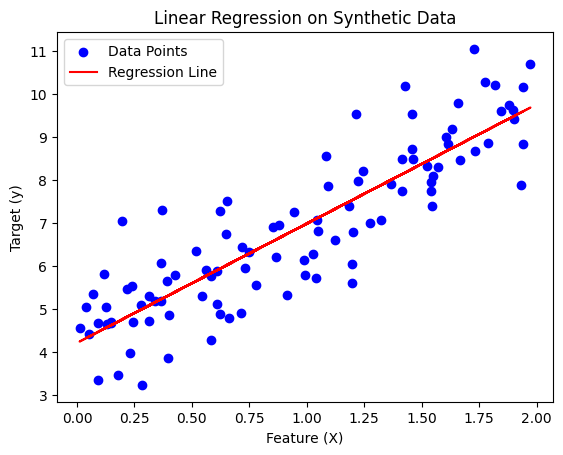

Coefficient (slope): 2.7701133864384837
Intercept: 4.215096157546747


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

# Print the model's coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")

In [12]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generate synthetic data with multicollinearity
np.random.seed(42)
X = np.random.rand(100, 3)  # 3 features
X[:, 2] = X[:, 0] + X[:, 1] + np.random.normal(0, 0.1, 100)  # Introduce multicollinearity

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = range(X.shape[1])
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)

   Feature         VIF
0        0   36.597460
1        1   39.116491
2        2  125.453654


ValueError: x and y can be no greater than 2D, but have shapes (100, 1) and (100, 1, 1)

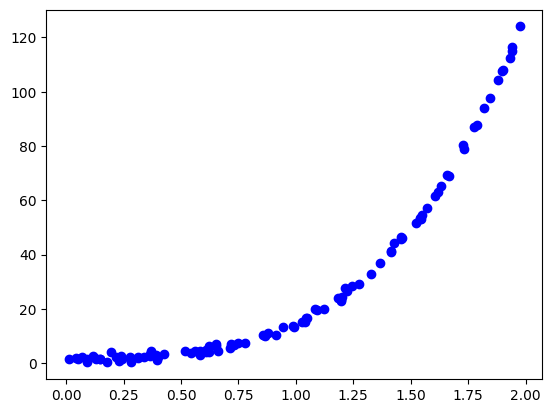

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 1 + 2 * X + 3 * X**2 + 4 * X**3 + 5 * X**4 + np.random.randn(100, 1)  # Polynomial relationship with noise

# Transform features to polynomial features (degree 4)
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot the data points and regression curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), y_pred[np.argsort(X, axis=0)], color='red', label='Polynomial Regression Curve')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 4)')
plt.legend()
plt.show()

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)  # 3 features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)  # Linear relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and multiple linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and calculate R-squared score
y_pred = pipeline.predict(X_test)
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

R-squared Score: 0.6546


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)  # 3 features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)  # Linear relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with standardization and multiple linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and calculate R-squared score
y_pred = pipeline.predict(X_test)
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

R-squared Score: 0.6546


ValueError: x and y can be no greater than 2D, but have shapes (100, 1) and (100, 1, 1)

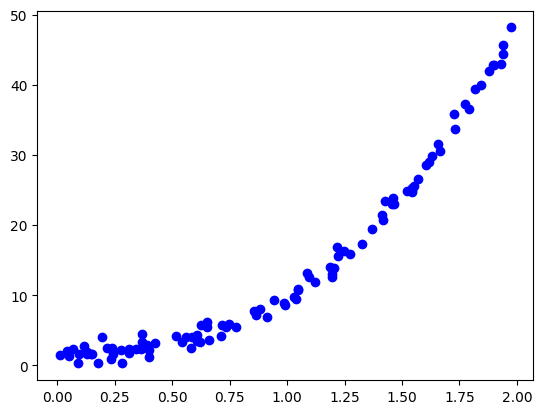

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 1 + 2 * X + 3 * X**2 + 4 * X**3 + np.random.randn(100, 1)  # Polynomial relationship with noise

# Transform features to polynomial features (degree 3)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Plot the data points and regression curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(np.sort(X, axis=0), y_pred[np.argsort(X, axis=0)], color='red', label='Polynomial Regression Curve')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with 5 features
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 data points with 5 features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + 6 * X[:, 3] + 1 * X[:, 4] + np.random.randn(100)  # Linear relationship with noise

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {r2_score(y, model.predict(X)):.4f}")

Coefficients: [2.73705069 4.57543206 2.46306669 6.03826237 0.68577644]
Intercept: 4.237211937493543
R-squared Score: 0.8337


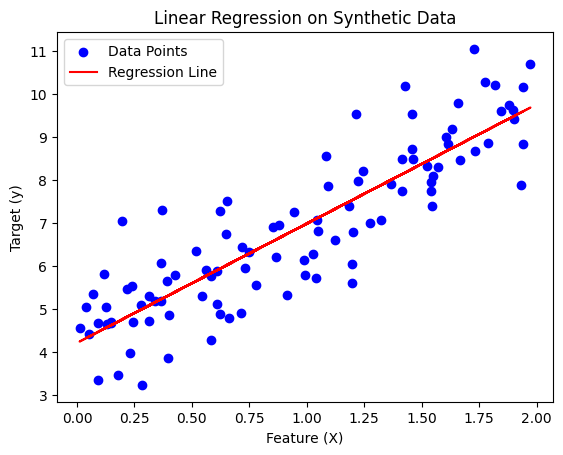

Coefficient (slope): 2.7701133864384837
Intercept: 4.215096157546747


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 data points with one feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

# Print the model's coefficient and intercept
print(f"Coefficient (slope): {model.coef_[0][0]}")
print(f"Intercept: {model.intercept_[0]}")

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data with 3 features
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 data points with 3 features
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)  # Linear relationship with noise

# Fit a multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficients, intercept, and R-squared score
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {r2_score(y, model.predict(X)):.4f}")

Coefficients: [3.27800411 4.84223781 2.57040576]
Intercept: 3.7350145551577416
R-squared Score: 0.7982


In [24]:
import joblib
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Serialize the model to a file
joblib.dump(model, 'linear_regression_model.joblib')

# Deserialize the model from the file
loaded_model = joblib.load('linear_regression_model.joblib')

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X)
print(f"Predictions: {y_pred[:5]}")

Predictions: [[5.16651299]
 [6.63012609]
 [6.07452677]
 [5.73582447]
 [4.61141889]]


In [25]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# Load the 'tips' dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

# Apply one-hot encoding to categorical features
categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Print the R-squared score
print(f"R-squared Score: {r2_score(y, model.predict(X_encoded)):.4f}")

R-squared Score: 0.4614


In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

# Fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_r2 = r2_score(y, linear_model.predict(X))

# Fit a Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
ridge_r2 = r2_score(y, ridge_model.predict(X))

# Print coefficients and R-squared scores
print("Linear Regression Coefficients:", linear_model.coef_)
print("Linear Regression R-squared:", linear_r2)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Ridge Regression R-squared:", ridge_r2)

Linear Regression Coefficients: [3.27800411 4.84223781 2.57040576]
Linear Regression R-squared: 0.798175221849101
Ridge Regression Coefficients: [2.91551738 4.39448469 2.25653605]
Ridge Regression R-squared: 0.7899900831377964


In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 5 * X[:, 1] + 2 * X[:, 2] + np.random.randn(100)

# Fit a Linear Regression model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, scoring='r2', cv=5)

# Print the R-squared scores for each fold
print(f"Cross-Validation R-squared Scores: {scores}")
print(f"Mean R-squared Score: {scores.mean():.4f}")

Cross-Validation R-squared Scores: [0.81243437 0.64060903 0.72503739 0.87545122 0.8033352 ]
Mean R-squared Score: 0.7714


In [28]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 3 * X**2 + 4 * X**3 + np.random.randn(100, 1)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]

# Fit and evaluate polynomial regression models
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree}: R-squared Score = {r2:.4f}")

Degree 1: R-squared Score = 0.8799
Degree 2: R-squared Score = 0.9942
Degree 3: R-squared Score = 0.9958
Degree 4: R-squared Score = 0.9958
Degree 5: R-squared Score = 0.9958
